# Numpy
*Resources:*
1. [NumPy quickstart](https://numpy.org/doc/stable/user/quickstart.html)
2. Python Data Science Handbook by Jake VanderPlas, [Introduction to NumPy](https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html)
3. [Numpy Documentation](https://numpy.org/doc/1.19/contents.html#numpy-docs-mainpage)

Please, use Python >= 3.6

In [1]:
import numpy as np

In [2]:
# numpy matrix multiplication
a = np.arange(4).reshape((2, 2))
b = np.linspace(0.0, 1.0, 4).reshape((2, 2))
c = np.matmul(a, b)
print("a =\n", a)
print("b =\n", b)
print("c = a*b =\n", c)

a =
 [[0 1]
 [2 3]]
b =
 [[0.         0.33333333]
 [0.66666667 1.        ]]
c = a*b =
 [[0.66666667 1.        ]
 [2.         3.66666667]]


In [3]:
# Solve polynomials equations
np.roots([1., 0, -1])

array([-1.,  1.])

In [4]:
# Find if the element is unique
# https://numpy.org/doc/stable/reference/generated/numpy.unique.html
np.random.seed(42)
a = np.random.randint(0, 5, 10)
unique, unique_index = np.unique(a, return_index=True)
is_unique = np.zeros_like(a)
is_unique[unique_index] = 1
print("a:", a)
print("unique:", unique)
print("unique_index:", unique_index)
print("is_unique", is_unique)



a: [3 4 2 4 4 1 2 2 2 4]
unique: [1 2 3 4]
unique_index: [5 2 0 1]
is_unique [1 1 1 0 0 1 0 0 0 0]


# Homework

Each task should utilize numpy!

## Task 1. (1)

Make a function to compute moving average for 1D array with a given window.

E.g.:

a = [6 3 7 4 6]

moving average, window=3: [5.33333333 4.66666667 5.66666667]

In [7]:
np.random.seed(42)
a = np.random.rand(10)
a = [6,3,7,4,6]

def moving_average(a, window):
    mov_ave = []
    for i in range(len(a)-window):
        mov_ave.append(np.mean(a[i:i+window]))
    return mov_ave

print("a:", a)
print("moving average, window=3:", moving_average(a, 3))

a: [6, 3, 7, 4, 6]
moving average, window=3: [5.333333333333333, 4.666666666666667]


## Task 2. (2)

Find indices of all local maxima for a 1D array. A local maximum is a point surrounded by smaller value.

E.g.:

a = [1, 3, 2, 4, 5, 0]

local_maxima = [1, 4]

In [6]:
np.random.seed(42)
a = np.random.randint(0, 7, 12)  # Should work with other arrays!

left = np.where(a[1:-1]>a[2:])
right = np.where(a[:-2]<a[1:-1])
    
local_maxima = np.intersect1d(left,right)+1

print("a:", a)
print("local_maxima:", local_maxima)


a: [6 3 4 6 2 4 4 6 1 2 6 2]
local_maxima: [ 3  7 10]


## Task 3. (2)

Given an array `a` of random integers in range [0, 255] of shape (32, 32, 3), normalize it (`a_norm`) so mean and std values are:



```
np.mean(a_norm, (0, 1)) # [0.485, 0.456, 0.406]
np.std(a_norm, (0, 1)) # [0.229, 0.224, 0.225]
```




In [7]:
np.random.seed(123)
a = np.random.randint(0, 256, (32, 32, 3))

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

a_norm = a/np.std(a, (0, 1))*std
a_norm = a_norm-np.mean(a_norm,(0,1))+mean

print("Mean:", np.mean(a_norm, (0, 1)))
print("Std:", np.std(a_norm, (0, 1)))

Mean: [0.485 0.456 0.406]
Std: [0.229 0.224 0.225]


## Task 4*. (2)

Fit the given set of points `x` and `y` with a line `y = a*x + b` using [gradient decent](https://en.wikipedia.org/wiki/Gradient_descent).
The final result should contain `a` and `b`.

In [8]:
np.random.seed(123)
x = np.linspace(0, 10, 101)
y = 2.0*x + 3.0 + np.random.uniform(-1.0, 1.0, x.shape)

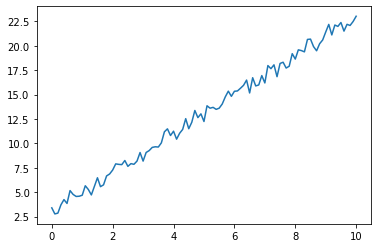

In [9]:
import matplotlib.pyplot as plt
plt.plot(x,y)

In [12]:
def gradient_decent(x,y):
    a = np.random.randint(0,100)
    b = np.random.randint(0,100)
    print(a, b)
    delta = 0.0005
    
    while True:
        grad_a = -2*np.mean(x*(y-a*x-b))
        grad_b = -2*np.mean(y-a*x-b)
        norm = np.linalg.norm([grad_a, grad_b])
        if (norm<0.001):
            break
        a = a-delta*grad_a
        b = b-delta*grad_b
    return a,b

In [13]:
a, b = gradient_decent(x,y)
print("a = {}, b = {}".format(a, b))

6 65
a = 1.9982262215446986, b = 3.0124526949851016
